In [150]:
!pip install matplotlib

In [640]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import time
from scipy import stats

%matplotlib inline

In [498]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Table of Contents

- [Challenge](#Challenge)
- [Analysis Plan](#Analysis-Plan)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Understanding the variables](#Understanding-the-variables)
    - [Handling missing data and datatypes](#Handling-missing-data-and-atatypes)
    - [Exploring the variables](#Exploring-the-variables)
        - [AÑO MES DIA DIANOM](#AÑO-MES-DIA-DIANOM)
        - [VLO ORI DES EMP TIPOVUELO](#VLO-ORI-DES-EMP-TIPOVUELO)
        


# Challenge 

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017.

# Analysis Plan

- Check the dimensions of the dataset
- Check for missing values
- Explore the variables: Look at the variables in the dataset to understand what information is included.
- Check for outliers: Use summary statistics such as mean, median, and standard deviation to identify any extreme values that may be considered outliers.
- Visualize the data: Create visualizations such as histograms, scatter plots, or box plots to explore the data distribution and identify any patterns or trends.
- Calculate summary statistics: Calculate summary statistics such as mean, median, standard deviation, or percentiles to further explore the data.
- Explore relationships between variables: Use correlation analysis or other statistical techniques to explore the relationships between variables and identify any potential predictors of flight delays.


In [52]:
df = pd.read_csv("dataset_SCL.csv")

/var/folders/rd/m9yc5w7d1573qy221g2pwxrh0000gp/T/ipykernel_34220/1100006479.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_SCL.csv")


In [32]:
df.shape

(68206, 18)

## Exploratory Data Analysis

### Understanding the variables

1. Fecha-I: Scheduled date and time of the flight.
2. Vlo-I : Scheduled flight number.
3. Ori-I : Programmed origin city code.
4. Des-I : Programmed destination city code.
5. Emp-I : Scheduled flight airline code.
6. Fecha-O : Date and time of flight operation.
7. Vlo-O : Flight operation number of the flight.
8. Ori-O : Operation origin city code
9. Des-O : Operation destination city code.
10. Emp-O : Airline code of the operated flight.
11. DIA: Day of the month of flight operation.
12. MES : Number of the month of operation of the flight.
13. AÑO : Year of flight operation.
14. DIANOM : Day of the week of flight operation.
15. TIPOVUELO : Type of flight, I =International, N =National.
16. OPERA : Name of the airline that operates.
17. SIGLAORI: Name city of origin.
18. SIGLADES: Destination city name.

In [34]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## Handling missing data and datatypes

In [42]:
# While reading the dataframe, python accused some columns have mixes types. Let's check which columns are this 
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [98]:
df.isna().any()

Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool

In [46]:
for col in df.columns:
    print(f"{col} -> {pd.api.types.infer_dtype(df[col])}")

Fecha-I -> string
Vlo-I -> mixed-integer
Ori-I -> string
Des-I -> string
Emp-I -> string
Fecha-O -> string
Vlo-O -> mixed
Ori-O -> string
Des-O -> string
Emp-O -> string
DIA -> integer
MES -> integer
AÑO -> integer
DIANOM -> string
TIPOVUELO -> string
OPERA -> string
SIGLAORI -> string
SIGLADES -> string


The columns "Vlo-I" and "Vlo-O" have been detected as mixed-integer, which means they contain both numeric and non-numeric values. Other columns, such as "Fecha-I" and "Fecha-O" are mapped to string values but it should be datetime. Some values in "Fecha-O" are null which requires further analysis. 
 
Overall, the results suggest that the dataframe may require some data cleaning and type conversion to ensure the accuracy and consistency of the data for further analysis.

In [68]:
# convert columns to datetime
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df[["Fecha-I", "Fecha-O"]].dtypes

Fecha-I    datetime64[ns]
Fecha-O    datetime64[ns]
dtype: object

In [92]:
# most values of Vlo-I are numerics.
df["Vlo-I"].sample(10)

28431    9659
57396     116
20248     267
13035      81
9845      289
54560     572
38220      43
67684    1101
29192     184
12544    8029
Name: Vlo-I, dtype: object

In [94]:
# List the values that are not numeric 
df.loc[~df["Vlo-I"].apply(lambda x: str(x).isdigit()), :]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
27464,2017-06-16 20:30:00,940P,SCEL,KDFW,AAL,2017-06-16 20:50:00,940,SCEL,KDFW,AAL,16,6,2017,Viernes,I,American Airlines,Santiago,Dallas
39225,2017-08-07 19:00:00,591P,SCEL,LFPG,PUE,2017-08-07 20:35:00,591P,SCEL,LFPG,PUE,7,8,2017,Lunes,I,Plus Ultra Lineas Aereas,Santiago,Paris
39266,2017-08-24 23:00:00,846A,SCEL,KIAH,UAL,2017-08-24 23:00:00,2804,SCEL,KIAH,UAL,24,8,2017,Jueves,I,United Airlines,Santiago,Houston
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena


A flight number is a unique identifier assigned to a specific flight by an airline. It typically consists of a two-letter airline code, followed by a three or four-digit number that identifies the specific flight. The flight number is used to track the flight's status, schedule, and other information related to the flight.

Since the flight number is not a numeric quantity that can be subjected to mathematical operations, it can be considered a categorical variable. Therefore, it makes sense to map the "Vlo-I" column to the string data type to represent the flight number as a categorical variable. By doing this, the data will be more accurately represented and can be properly analyzed using methods appropriate for categorical data.

In [96]:
df["Vlo-I"] = df["Vlo-I"].astype(str)


--

Let's check what are the missing values on Vl0-I

In [118]:
df[df["Vlo-O"].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [148]:
# The data indicated that Scheduled flight number Vlo-I should be the same as for Vlo-O for most of the cases. 
df.loc[df["Vlo-I"] == "200",]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6058,2017-01-01 11:00:00,200,SCEL,SPJC,LAW,2017-01-01 11:07:00,200,SCEL,SPJC,48O,1,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6059,2017-01-03 11:00:00,200,SCEL,SPJC,LAW,2017-01-03 11:23:00,200,SCEL,SPJC,48O,3,1,2017,Martes,I,Latin American Wings,Santiago,Lima
6060,2017-01-08 11:00:00,200,SCEL,SPJC,LAW,2017-01-08 11:46:00,200,SCEL,SPJC,48O,8,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6061,2017-01-09 11:00:00,200,SCEL,SPJC,LAW,2017-01-09 11:08:00,200,SCEL,SPJC,48O,9,1,2017,Lunes,I,Latin American Wings,Santiago,Lima
6062,2017-01-11 11:00:00,200,SCEL,SPJC,LAW,2017-01-11 11:10:00,200,SCEL,SPJC,48O,11,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67763,2017-12-25 12:00:00,200,SCEL,SPJC,LAW,2017-12-25 12:08:00,200.0,SCEL,SPJC,JMR,25,12,2017,Lunes,I,Latin American Wings,Santiago,Lima
67764,2017-12-26 12:00:00,200,SCEL,SPJC,LAW,2017-12-26 12:04:00,200.0,SCEL,SPJC,JMR,26,12,2017,Martes,I,Latin American Wings,Santiago,Lima
67765,2017-12-27 12:00:00,200,SCEL,SPJC,LAW,2017-12-27 12:00:00,200.0,SCEL,SPJC,JMR,27,12,2017,Miercoles,I,Latin American Wings,Santiago,Lima
67766,2017-12-28 12:00:00,200,SCEL,SPJC,LAW,2017-12-28 12:10:00,200.0,SCEL,SPJC,JMR,28,12,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [124]:
# Let's calculate the percentage of flights where the flight number in the "Vlo-I"
# column matches the flight number in the "Vlo-O" column


(df["Vlo-I"] == df["Vlo-O"]).sum() / df.shape[0]

0.9337448318329765

In [131]:
# We observerd the presence of decimal values in the "Vlo-O" column. 
# To ensure accurate comparison with the "Vlo-I" column, we'll remove the decimal values and 
# re-calculate the rate of flights where the "Vlo-O" value matches the "Vlo-I" value.


(df["Vlo-O"].apply(lambda x: str(x).split(".")[0]) == df["Vlo-I"]).sum() / df.shape[0]

0.9982406239920242

In [487]:
df["Vlo-O"] = df["Vlo-O"].apply(lambda x: str(x).split(".")[0])

In [488]:
# Since 99% of "Vlo-O" values matches the "Vlo-I" values we can safely input the missing data with 
# the value present in "Vlo-I"

df.loc[df["Vlo-O"].isna(), "Vlo-O"] = df.loc[df["Vlo-O"].isna(), "Vlo-I"]

In [489]:
df["Vlo-O"].isna().any()

False

## Exploring the variables

### AÑO MES DIA DIANOM

In [144]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [163]:
df["AÑO"].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

<AxesSubplot: >

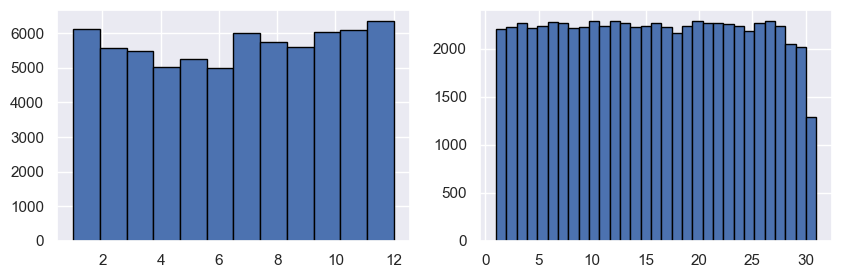

In [348]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(10,3))

df["MES"].hist(ax=axs[0], bins=12, edgecolor='black')
df["DIA"].hist(ax=axs[1], bins=31, edgecolor='black')

The distribution of the "MES" variable appears to be relatively uniform, with the number of flights occurring in each month varying by only a few hundred flights. The highest number of flights occurred in December (6356 flights), followed closely by January (6108 flights) and November (6080 flights), while the lowest number of flights occurred in June (4981 flights).

The distribution of the variable shows that there are more flights departing from Santiago, Chile in December, January, and February (months 12, 1, and 2 respectively), which corresponds to the summer vacation period in the Southern Hemisphere. On the other hand, there are fewer flights in the months of May, June, and July (months 5, 6, and 7), which correspond to the winter season in the Southern Hemisphere. This pattern suggests a seasonal variation in the demand for flights departing from Santiago, Chile, with higher demand during the summer months and lower demand during the winter months.


In [235]:
df.groupby(["AÑO",  "DIA"])["DIA"].count()

AÑO   DIA
2017  1      2206
      2      2223
      3      2271
      4      2215
      5      2241
      6      2275
      7      2264
      8      2213
      9      2227
      10     2283
      11     2237
      12     2284
      13     2272
      14     2221
      15     2239
      16     2268
      17     2228
      18     2160
      19     2238
      20     2290
      21     2267
      22     2272
      23     2260
      24     2232
      25     2179
      26     2267
      27     2286
      28     2232
      29     2044
      30     2020
      31     1290
2018  1         2
Name: DIA, dtype: int64

Days 20, 27, and 12 had the highest number of flights, while days 18, 25, and 29 had the lowest number of flights. There are also fewer flights in the latter part of the month, with days 30 and 31 having the fewest flights.

Since the day 31 only occurs in seven months of the year, while the other days occur in all twelve months, it's likely that there are fewer flights on the 31st due to the fact that it's only applicable to a smaller subset of the year.

Text(0.5, 1.0, 'Distribution of flights by day of the week')

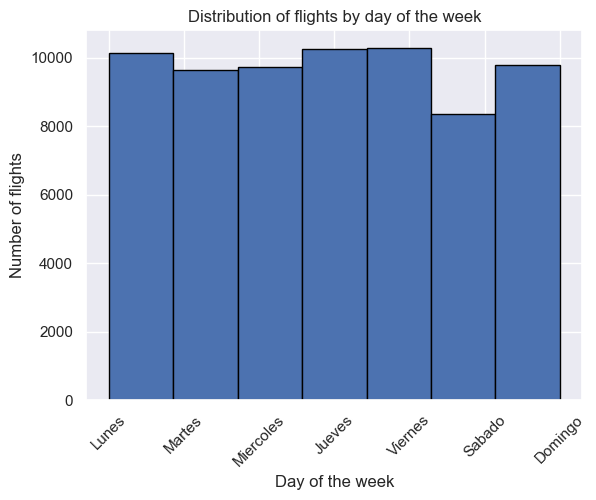

In [347]:
day_map = {'Lunes': 1, 'Martes': 2, 'Miercoles': 3, 'Jueves': 4, 'Viernes': 5, 'Sabado': 6, 'Domingo': 7}

# add a new column with the day numbers
df['day_num'] = df['DIANOM'].map(day_map)

# sort the dataframe by day_num
df = df.sort_values(by='day_num')

# create the histogram
df['DIANOM'].hist(bins=7, edgecolor='black')
plt.xticks(rotation=45)

# set the axis labels and title
plt.xlabel('Day of the week')
plt.ylabel('Number of flights')
plt.title('Distribution of flights by day of the week')



The data shows that the number of flights per day varies throughout the year, with higher numbers in the summer and lower numbers in the winter. The 30th and 31st of each month have lower numbers of flights than other days, likely due to the fact that fewer months have 31 days.

The day of the week with the highest number of flights is Friday, followed closely by Thursday and Monday. The lowest number of flights occur on Saturdays.

In [435]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,Departure Time
34102,2017-07-03 18:00:00,108,SCEL,SCSE,SKU,2017-07-03 18:05:00,108,SCEL,SCSE,SKU,3,7,2017,Lunes,N,Sky Airline,Santiago,La Serena,1,18:00:00
67508,2017-12-18 05:30:00,2370,SCEL,SPJC,LAN,2017-12-18 05:55:00,2370.0,SCEL,SPJC,LPE,18,12,2017,Lunes,I,Grupo LATAM,Santiago,Lima,1,05:30:00
38173,2017-07-10 06:00:00,31,SCEL,SCTE,LAW,2017-07-10 06:15:00,31,SCEL,SCTE,JMR,10,7,2017,Lunes,N,Latin American Wings,Santiago,Puerto Montt,1,06:00:00
28953,2017-06-19 15:25:00,130,SCEL,SCCF,SKU,2017-06-19 15:27:00,130,SCEL,SCCF,SKU,19,6,2017,Lunes,N,Sky Airline,Santiago,Calama,1,15:25:00
29005,2017-06-19 05:50:00,140,SCEL,SCFA,SKU,2017-06-19 05:55:00,140,SCEL,SCFA,SKU,19,6,2017,Lunes,N,Sky Airline,Santiago,Antofagasta,1,05:50:00


### VLO ORI DES EMP TIPOVUELO

In [421]:
df["Ori-I"].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-I, dtype: object

In [422]:
df["Ori-O"].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-O, dtype: object

All the scheduled flights have Santiago, Chile as their origin city and the operated flights also have Santiago as either their origin or destination city.

---

In [439]:
# in 99% of the cases, the scheduled destination of a flight matches the actual operated destination.
(df["Des-I"] == df["Des-O"]).sum() / df.shape[0]

0.9995894789314723

In [458]:
df["ChangedDestionationAirport"] = (df["Des-I"] != df["Des-O"])

In [467]:
df.loc[df["ChangedDestionationAirport"] == True].sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,Departure Time,DestinationChanged,ChangedDestionationAirport
38135,2017-07-17 16:00:00,7813,SCEL,SABE,LAN,2017-07-17 16:41:00,1113,SCEL,SAEZ,LAN,17,7,2017,Lunes,I,Grupo LATAM,Santiago,Buenos Aires,1,16:00:00,True,True
42112,2017-08-07 11:00:00,293,SCEL,SCCI,LAN,2017-08-07 11:07:00,293,SCEL,SCTE,LXP,7,8,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt,1,11:00:00,True,True
12823,2017-03-22 12:50:00,17,SCEL,SCBA,SKU,2017-03-22 12:48:00,17,SCEL,SCTE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Puerto Montt,3,12:50:00,True,True
16937,2017-03-22 17:00:00,1446,SCEL,SEGU,LAN,2017-03-22 17:11:00,1361,SCEL,SABE,LAN,22,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires,3,17:00:00,True,True
67599,2017-12-01 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-01 11:22:00,7811.0,SCEL,SABE,DSM,1,12,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires,5,11:20:00,True,True
7290,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,15,2,2017,Miercoles,N,Sky Airline,Santiago,Temuco,3,06:25:00,True,True
67601,2017-12-03 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-03 11:30:00,7811.0,SCEL,SABE,DSM,3,12,2017,Domingo,I,Grupo LATAM,Santiago,Buenos Aires,7,11:20:00,True,True
37162,2017-07-26 08:45:00,455,SCEL,SABE,LAN,2017-07-26 09:45:00,1155,SCEL,SAEZ,LAN,26,7,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires,3,08:45:00,True,True
20444,2017-04-14 22:00:00,289,SCEL,SCTE,LAN,2017-04-14 22:01:00,289,SCEL,SCCI,LXP,14,4,2017,Viernes,N,Grupo LATAM,Santiago,Punta Arenas,5,22:00:00,True,True
25419,2017-05-09 08:30:00,271,SCEL,SCBA,LAN,2017-05-09 08:31:00,271,SCEL,SCTE,LXP,9,5,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt,2,08:30:00,True,True


In [466]:
df.loc[df["ChangedDestionationAirport"] == True].groupby(["Des-I","Des-O"])["Des-O"].count()

Des-I  Des-O
KIAH   KIAD     1
KJFK   KMIA     1
SABE   SAEZ     4
SAEZ   SABE     3
SARI   SBFI     1
SBGR   SBGL     1
SCBA   SCTE     4
SCCI   SCTE     1
SCFA   SCCF     1
SCIE   SCQP     1
       SCTE     1
SCTE   SCCI     1
       SCQP     5
SEGU   SABE     1
SEQU   SEQM     1
YSSY   YMML     1
Name: Des-O, dtype: int64

The most common changes involve airports in Buenos Aires, with SABE and SAEZ airports exchanging flights, and Santiago, with SCTE airport being a common replacement for flights originally scheduled to land at SCQP.



In [532]:
df.shape

(68206, 24)

In [546]:
tmp = df.groupby(["SIGLADES"]).size().sort_values(ascending=False).reset_index(name='Count')
tmp["Percentage"] = tmp["Count"] / tmp["Count"].sum()

In [551]:
tmp.head(10)

,SIGLADES,Count,Percentage
0,Buenos Aires,6335,0.092880
1,Antofagasta,5786,0.084831
2,Lima,5270,0.077266
3,Calama,5146,0.075448
4,Puerto Montt,4357,0.063880
5,Concepcion,3993,0.058543
6,Iquique,3747,0.054937
7,Sao Paulo,3569,0.052327
8,Temuco,2589,0.037959
9,Arica,2436,0.035715


We can see that the top 10 destinations of the flights in this dataset are mainly located in Argentina, Chile, Peru, and Brazil. Buenos Aires, Antofagasta, and Lima are the top three destinations with the highest number of flights. Additionally, we can see that these top 10 destinations account for a significant proportion of the total flights, which indicates their importance as travel hubs in this region.

---

In [471]:
(df["Emp-I"] == df["Emp-O"]).sum() / df.shape[0]

0.726285077559159

For about 73% of the scheduled flights, the airline remains the same for the operation, meaning that in 27% of cases there is a change of airline from the scheduled flight to the operated flight.

In [472]:
df["ChangedAirline"] = (df["Emp-I"] != df["Emp-O"])

In [474]:
df.loc[df["ChangedAirline"] == True].sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,Departure Time,DestinationChanged,ChangedDestionationAirport,ChangedAirline
10120,2017-02-20 10:35:00,332,SCEL,SCFA,LAN,2017-02-20 11:12:00,332,SCEL,SCFA,LXP,20,2,2017,Lunes,N,Grupo LATAM,Santiago,Antofagasta,1,10:35:00,False,False,True
20094,2017-04-07 18:25:00,239,SCEL,SCQP,LAN,2017-04-07 18:23:00,239,SCEL,SCQP,LXP,7,4,2017,Viernes,N,Grupo LATAM,Santiago,Temuco,5,18:25:00,False,False,True
30179,2017-06-08 15:30:00,213,SCEL,SCIE,LAN,2017-06-08 15:26:00,213,SCEL,SCIE,LXP,8,6,2017,Jueves,N,Grupo LATAM,Santiago,Concepcion,4,15:30:00,False,False,True
15374,2017-03-09 19:15:00,308,SCEL,SCSE,LAN,2017-03-09 19:11:00,308,SCEL,SCSE,LXP,9,3,2017,Jueves,N,Grupo LATAM,Santiago,La Serena,4,19:15:00,False,False,True
20520,2017-04-06 12:55:00,304,SCEL,SCSE,LAN,2017-04-06 12:53:00,304,SCEL,SCSE,LXP,6,4,2017,Jueves,N,Grupo LATAM,Santiago,La Serena,4,12:55:00,False,False,True
32146,2017-06-04 03:50:00,2474,SCEL,SPJC,LAN,2017-06-04 03:59:00,2474,SCEL,SPJC,LPE,4,6,2017,Domingo,I,Grupo LATAM,Santiago,Lima,7,03:50:00,False,False,True
61536,2017-11-26 15:00:00,202,SCEL,SPJC,LAW,2017-11-26 15:50:00,202,SCEL,SPJC,JMR,26,11,2017,Domingo,I,Latin American Wings,Santiago,Lima,7,15:00:00,False,False,True
36267,2017-07-21 14:10:00,285,SCEL,SCTE,LAN,2017-07-21 14:38:00,285,SCEL,SCTE,LXP,21,7,2017,Viernes,N,Grupo LATAM,Santiago,Puerto Montt,5,14:10:00,False,False,True
15216,2017-03-09 14:25:00,285,SCEL,SCTE,LAN,2017-03-09 14:32:00,285,SCEL,SCTE,LXP,9,3,2017,Jueves,N,Grupo LATAM,Santiago,Puerto Montt,4,14:25:00,False,False,True
53133,2017-10-27 07:47:00,259,SCEL,SCTE,LAN,2017-10-27 08:09:00,259,SCEL,SCTE,LXP,27,10,2017,Viernes,N,Grupo LATAM,Santiago,Puerto Montt,5,07:47:00,False,False,True


In [476]:
df.loc[df["ChangedAirline"] == True].groupby(["Emp-I","Emp-O"])["Emp-O"].count()

Emp-I  Emp-O
ARG    AUT          5
AUT    ARG          2
AVA    LRC        265
       TPU          2
LAN    DSM        491
       LNE        373
       LPE       1210
       LXP      14549
LAW    48O         10
       56R         17
       JMR       1547
QFU    QFA        195
TAM    LAP          3
Name: Emp-O, dtype: int64

Based on the information available on the [Wikipedia page](https://en.wikipedia.org/wiki/LATAM_Airlines_Group) for LATAM Airlines Group, this company contains many susidiaries. And it seems that a majority of airline changes occur within subsidiaries of the same parent airline. In the case of LATAM, most of the changes involve subsidiaries such as LAN, LXP, LPE, and LNE, which all belong to the same parent company. Similarly, for Avianca, most of the changes involve subsidiaries such as Avianca Ecuador and Avianca Costa Rica.

In [555]:
tmp = df.groupby(["OPERA"]).size().sort_values(ascending=False).reset_index(name='Count')
tmp["Percentage"] = tmp["Count"] / tmp["Count"].sum()
tmp.head(10)

,OPERA,Count,Percentage
0,Grupo LATAM,40892,0.599537
1,Sky Airline,14298,0.209630
2,Aerolineas Argentinas,1949,0.028575
3,Copa Air,1850,0.027124
4,Latin American Wings,1674,0.024543
5,Avianca,1152,0.016890
6,JetSmart SPA,1095,0.016054
7,Gol Trans,806,0.011817
8,American Airlines,757,0.011099
9,Air Canada,565,0.008284


the majority of flights are operated by the Grupo LATAM, which accounts for approximately 60% of all flights. Sky Airline is the second most popular airline, with around 21% of the flights. The other airlines on the list have a much smaller percentage of flights.

---

In [492]:
df["ChangedFlightNumber"] = (df["Vlo-I"] != df["Vlo-O"])

In [507]:
df.loc[df["ChangedFlightNumber"] == True].sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,Departure Time,DestinationChanged,ChangedDestionationAirport,ChangedAirline,ChangedFlightNumber
11606,2017-02-21 21:40:00,4503,SCEL,SAEZ,LAN,2017-02-21 22:14:00,1003,SCEL,SAEZ,LAN,21,2,2017,Martes,I,Grupo LATAM,Santiago,Buenos Aires,2,21:40:00,False,False,False,True
17026,2017-03-07 12:30:00,4501,SCEL,SAEZ,LAN,2017-03-07 12:28:00,1001,SCEL,SAEZ,LAN,7,3,2017,Martes,I,Grupo LATAM,Santiago,Buenos Aires,2,12:30:00,False,False,False,True
26712,2017-05-26 08:10:00,600,SCEL,SPJC,LAN,2017-05-26 08:17:00,1160,SCEL,SPJC,LAN,26,5,2017,Viernes,I,Grupo LATAM,Santiago,Lima,5,08:10:00,False,False,False,True
44939,2017-09-28 21:30:00,846,SCEL,KIAH,UAL,2017-09-28 21:44:00,846A,SCEL,KIAH,UAL,28,9,2017,Jueves,I,United Airlines,Santiago,Houston,4,21:30:00,False,False,False,True
26573,2017-05-21 19:30:00,530,SCEL,SPJC,LAN,2017-05-21 19:27:00,1102,SCEL,SPJC,LAN,21,5,2017,Domingo,I,Grupo LATAM,Santiago,Lima,7,19:30:00,False,False,False,True
6055,2017-01-03 19:50:00,1302,SCEL,SPJC,LAN,2017-01-03 21:27:00,2640,SCEL,SPJC,LAN,3,1,2017,Martes,I,Grupo LATAM,Santiago,Lima,2,19:50:00,False,False,False,True
11599,2017-02-14 21:50:00,4503,SCEL,SAEZ,LAN,2017-02-14 22:13:00,1003,SCEL,SAEZ,LAN,14,2,2017,Martes,I,Grupo LATAM,Santiago,Buenos Aires,2,21:50:00,False,False,False,True
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,4,07:05:00,False,False,False,True
16290,2017-03-25 09:10:00,600,SCEL,SPJC,LAN,2017-03-25 09:06:00,1300,SCEL,SPJC,LAN,25,3,2017,Sabado,I,Grupo LATAM,Santiago,Lima,6,09:10:00,False,False,False,True
17020,2017-03-01 11:20:00,4501,SCEL,SAEZ,LAN,2017-03-01 12:07:00,1001,SCEL,SAEZ,LAN,1,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires,3,11:20:00,False,False,False,True


In [508]:
df.loc[df["ChangedFlightNumber"] == True].groupby(["Vlo-I", "Vlo-O"])["Vlo-O"].count().sort_values()

Vlo-I  Vlo-O
1011   11        1
4503   1004      1
940P   940       1
455    1155      1
492    492R      1
500    1340      1
502    502R      1
503    502       1
530    1102      1
       534       1
532    1346      1
600    1160      1
       1300      1
4503   1001      1
622    622R      1
636    2486      1
700    702       1
       704       1
704    708       1
7811   1061      1
       1111      1
7813   1071      1
802    802R      1
846    2726      1
       2763      1
       846A      1
846A   2804      1
624    5924      1
43     43R       1
989P   989       1
114    114R      1
1498   1304      1
1704   1700      1
       704       1
118    4118      1
201    201R      1
204    202       1
207    207R      1
2287   1287      1
2291   1291      1
146    9858      1
2297   1297      1
2374   1102      1
1104A  1104      1
302    304       1
31     1031      1
338    338R      1
400    1400      1
110    33        1
401    401A      1
       401B      1
1071   71R       1

Some flights have had multiple changes over time. For example, flight 71 had two changes and became flight 71R, while flight 702 changed twice, first to 704 and then back to 702. Additionally, some flights had variations in their operation numbers such as 401A and 401B.

---

In [516]:
df["TIPOVUELO"].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

The difference between the two types is not very significant, as there are around 5,000 more flights of type "N" than type "I"

Some conclusions 

- The data only contain flights originating from Santiago, Chile. 
- There are frequent changes in flights between Buenos Aires airports and Santiago, with SCTE airport being a common replacement for SCQP.
- Most of the airline changes occur within subsidiaries of the same parent airline, such as LAN, LXP, LPE, and LNE for LATAM Airlines Group, and Avianca Ecuador and Avianca Costa Rica for Avianca.
- Multiple changes in flight numbers are not uncommon, and some flights have variations in their operation numbers.

### Fecha-I Fecha-O

"Fecha-I" refers to the scheduled date and time of the flight, while "Fecha-O" refers to the actual date and time of the flight operation.

In [566]:
df["DepartureHour"] = df["Fecha-I"].dt.hour

Text(0.5, 1.0, 'Distribution of Flight Departure Times')

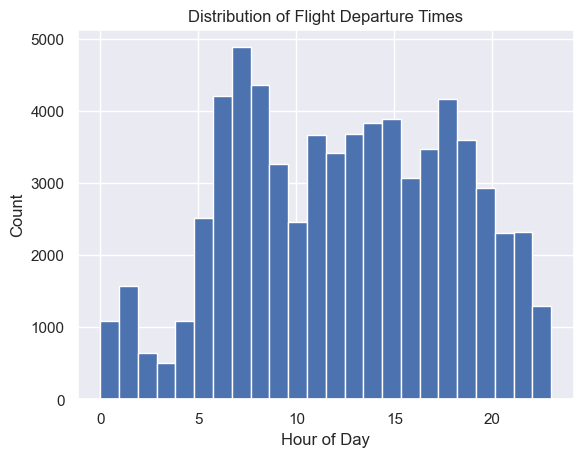

In [567]:
df["DepartureHour"] .hist(bins=24)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Distribution of Flight Departure Times")

The data indicates that the most common departure times are in the early morning (between 6am and 9am) and in the evening (between 6pm and 9pm). Specifically, 7am is the most common departure time with 4882 flights, followed closely by 8am with 4363 flights. The least common departure times are during the night, with only a few flights departing after 10pm and before 5am.

### High Season
Generate the High Season feature and perform an analysis
```
high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.

````


In [582]:
condition1 = (df["Fecha-I"].dt.month == 12) & (df["Fecha-I"].dt.day >= 15)
condition2 = (df["Fecha-I"].dt.month == 1) | (df["Fecha-I"].dt.month == 2)
condition3 = (df["Fecha-I"].dt.month == 3) & (df["Fecha-I"].dt.day <= 3)
condition4 = (df["Fecha-I"].dt.month == 7) & (df["Fecha-I"].dt.day >= 15) & (df["Fecha-I"].dt.day <= 31)
condition5 = (df["Fecha-I"].dt.month == 9) & (df["Fecha-I"].dt.day >= 11) & (df["Fecha-I"].dt.day <= 30)

In [585]:
df["high_season"] = (condition1 | condition2 | condition3 | condition4 | condition5).astype(int)


In [599]:
df["high_season"].value_counts()

0    45444
1    22762
Name: high_season, dtype: int64

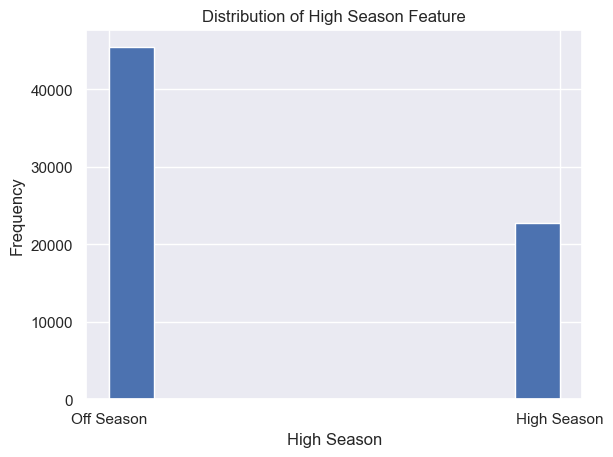

In [598]:
df["high_season"].hist()
plt.title("Distribution of High Season Feature")
plt.xlabel("High Season")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Off Season", "High Season"]);

It seems that there are more non-high season flights than high season flights in the dataset, which is not surprising given that high season periods are typically shorter than low season periods. However, it would be interesting to examine the distribution of other variables in high season vs. low season flights to identify any notable differences or patterns.

In [615]:
df["high_season"].describe()

count    68206.000000
mean         0.333724
std          0.471546
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: high_season, dtype: float64

In [616]:
opera_pivot = pd.pivot_table(df, values='high_season', index='OPERA', aggfunc='mean')

opera_pivot = opera_pivot.sort_values(by='high_season', ascending=False)

print(opera_pivot)

                          high_season
OPERA                                
Plus Ultra Lineas Aereas     0.408163
Lacsa                        0.391304
Gol Trans                    0.370968
Qantas Airways               0.353846
American Airlines            0.350066
Air Canada                   0.343363
United Airlines              0.340299
Copa Air                     0.338919
Sky Airline                  0.338789
Grupo LATAM                  0.337646
Avianca                      0.332465
K.L.M.                       0.322709
Alitalia                     0.320463
Iberia                       0.317680
Air France                   0.315642
Aeromexico                   0.313390
Delta Air                    0.312849
British Airways              0.312195
Austral                      0.310811
JetSmart SPA                 0.302283
Aerolineas Argentinas        0.294510
Latin American Wings         0.257467
Oceanair Linhas Aereas       0.240143


In [617]:
flight_type_pivot = pd.pivot_table(df, values='high_season', index='TIPOVUELO', aggfunc='mean')
flight_type_pivot = flight_type_pivot.sort_values(by='high_season', ascending=False)

print(flight_type_pivot)

           high_season
TIPOVUELO             
N             0.334172
I             0.333195


In [618]:
pivot = pd.pivot_table(df, values='high_season', index='SIGLADES', aggfunc='mean')
pivot = pivot.sort_values(by='high_season', ascending=False)

print(pivot)

                  high_season
SIGLADES                     
Cataratas Iguacu     1.000000
Punta del Este       0.833333
Puerto Natales       0.797468
Florianapolis        0.790123
Orlando              0.617647
Cancun               0.428571
Balmaceda            0.414779
Valdivia             0.379814
Rio de Janeiro       0.374216
Punta Arenas         0.372922
Iquique              0.360822
Sydney               0.355670
Temuco               0.354577
Montevideo           0.352720
Arica                0.348522
Nueva York           0.345550
Miami                0.345472
Puerto Montt         0.343585
Houston              0.341317
Guayaquil            0.341232
Lima                 0.340987
Isla de Pascua       0.340708
Toronto              0.339223
Ciudad de Panama     0.338919
Sao Paulo            0.337349
La Serena            0.335685
Ushuia               0.333333
Castro (Chiloe)      0.331915
Bogota               0.331671
Los Angeles          0.329032
Antofagasta          0.325959
Buenos Air

In [619]:
pivot = pd.pivot_table(df, values='high_season', index='DIANOM', aggfunc='mean')
pivot = pivot.sort_values(by='high_season', ascending=False)

print(pivot)

           high_season
DIANOM                
Sabado        0.359315
Viernes       0.344345
Lunes         0.337676
Domingo       0.332891
Miercoles     0.327299
Jueves        0.319188
Martes        0.318878


The high season flight analysis showed that most flights in the dataset occur during the non-high season periods. However, some destinations, airlines, and flight types have a higher proportion of high season flights. Beach destinations like Cataratas Iguacu, Punta del Este, and Cancun have more high season flights. Plus Ultra Lineas Aereas, Lacsa, Gol Trans, and Qantas Airways have a higher proportion of high season flights compared to other airlines. The day of the week did not show significant differences in the proportion of high season flights.

### Min diff
The "min_diff" feature represents the difference in minutes between the scheduled arrival time (Fecha-O) and the scheduled departure time (Fecha-I)

In [627]:
df["min_diff"] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

Text(0, 0.5, 'Frequency')

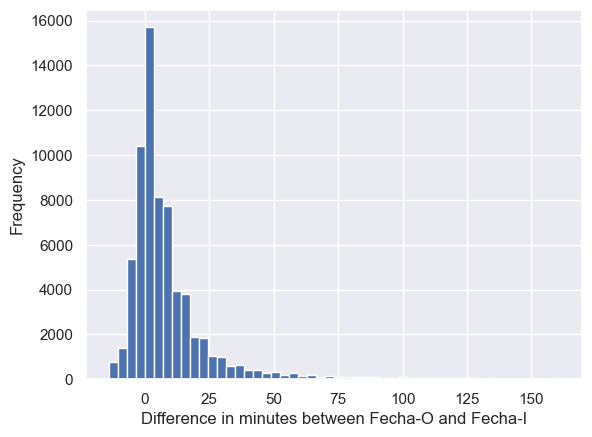

In [628]:
df["min_diff"].hist(bins=50)
plt.xlabel('Difference in minutes between Fecha-O and Fecha-I')
plt.ylabel('Frequency')

In [ ]:
df["min_diff"].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: min_diff, dtype: float64

The minimum time difference between the scheduled and actual flight times (min_diff) is -14 minutes, indicating that some flights departed earlier than their scheduled time.The maximum difference is 161 minutes, indicating that some flights departed significantly later than their scheduled time. The mean time difference is 9.1 minutes, which suggests that, on average, flights departed slightly later than their scheduled time.



<AxesSubplot: >

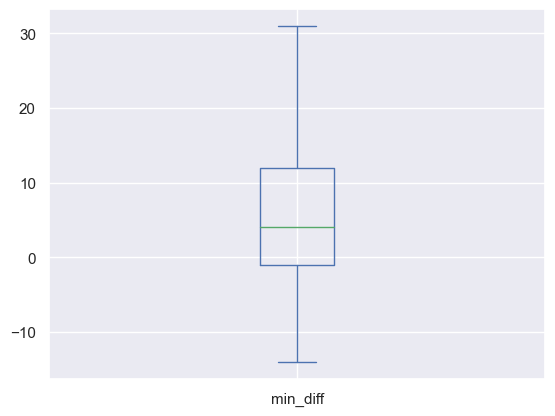

In [646]:
df["min_diff"].plot.box(showfliers=False)

In [666]:
df['delay_15'] = df['min_diff'].apply(lambda x: 1 if x > 15 else 0)
df['period_day'] = pd.cut(df['Fecha-I'].dt.hour, 
                            bins=[0, 5, 12, 19, 24], 
                            labels=['night', 'morning', 'afternoon', 'night'],  ordered=False)

In [651]:
df["delay_15"]

34102    0
67508    1
38173    0
28953    0
29005    0
        ..
23522    0
23528    0
23534    0
23486    0
68205    0
Name: delay_15, Length: 68206, dtype: int64

In [660]:
pivot = pd.pivot_table(df, values=['min_diff'], index='TIPOVUELO', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)

print(pivot)

            min_diff
TIPOVUELO           
I          10.638892
N           7.819510


In [658]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'day_num', 'Departure Time',
       'DestinationChanged', 'ChangedDestionationAirport', 'ChangedAirline',
       'ChangedFlightNumber', 'DepartureHour', 'high_season', 'min_diff',
       'delay_15', 'period_day'],
      dtype='object')

In [661]:
pivot = pd.pivot_table(df, values=['min_diff'], index='DIA', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)

print(pivot)

      min_diff
DIA           
15   12.459134
11   11.546714
10   11.232151
16    9.947972
6     9.914286
14    9.833859
20    9.743231
25    9.727857
4     9.595485
22    9.459507
17    9.435817
21    9.412880
26    9.299956
12    9.131786
18    9.113889
13    9.076144
9     8.807813
5     8.797858
3     8.739762
23    8.659292
8     8.247628
24    8.243728
28    8.242832
29    8.174168
7     8.133834
30    7.955941
27    7.889764
19    7.835567
31    7.829457
1     7.756793
2     7.391813


In [663]:
pivot = pd.pivot_table(df, values=['min_diff'], index='high_season', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)

print(pivot)

             min_diff
high_season          
1            9.681179
0            8.825191


In [664]:
pivot = pd.pivot_table(df, values=['min_diff'], index='OPERA', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

                           min_diff
OPERA                              
Plus Ultra Lineas Aereas  31.714286
Qantas Airways            26.835897
Latin American Wings      24.566308
Air Canada                22.909735
Gol Trans                 11.911911
Avianca                   11.131944
Aerolineas Argentinas     10.004618
Grupo LATAM                9.470630
Sky Airline                8.117149
British Airways            7.560976
JetSmart SPA               7.442009
Austral                    6.608108
Oceanair Linhas Aereas     6.340502
Alitalia                   5.293436
Lacsa                      4.880435
Iberia                     4.276243
Air France                 1.399441
K.L.M.                     1.310757
American Airlines          0.277411
Copa Air                   0.214054
Delta Air                  0.114525
United Airlines           -1.856716
Aeromexico                -2.495726


In [686]:
pivot = pd.pivot_table(df, values=['min_diff'], index='V-I', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

         min_diff
Vlo-I            
1202   145.000000
7959   127.000000
1151   105.000000
9510    98.000000
591P    95.000000
...           ...
7661    -5.003922
9268    -5.166667
356     -7.000000
9625    -7.000000
1351   -10.000000

[584 rows x 1 columns]


In [667]:
pivot = pd.pivot_table(df, values=['min_diff'], index='period_day', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

            min_diff
period_day          
afternoon   9.907689
night       8.748371
morning     8.418476


In [669]:
pivot = pd.pivot_table(df, values=['min_diff'], index='DestinationChanged', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

                     min_diff
DestinationChanged           
True                25.607143
False                9.104080


In [670]:
pivot = pd.pivot_table(df, values=['min_diff'], index='ChangedDestionationAirport', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

                             min_diff
ChangedDestionationAirport           
True                        25.607143
False                        9.104080


In [672]:
pivot = pd.pivot_table(df, values=['min_diff'], index='ChangedAirline', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

                min_diff
ChangedAirline          
True            9.973646
False           8.785696


In [675]:
pivot = pd.pivot_table(df, values=['min_diff'], index='ChangedFlightNumber', aggfunc='mean')
pivot = pivot.sort_values(by='min_diff', ascending=False)
print(pivot)

                      min_diff
ChangedFlightNumber           
True                 27.117647
False                 9.079384


In [684]:
df.groupby(
    ["ChangedFlightNumber", "ChangedAirline", "ChangedDestionationAirport", "DestinationChanged", "high_season"]
)["min_diff"].mean().reset_index().sort_values("min_diff")

,ChangedFlightNumber,ChangedAirline,ChangedDestionationAirport,DestinationChanged,high_season,min_diff
0,False,False,False,False,0,8.489633
1,False,False,False,False,1,9.270275
4,False,True,False,False,0,9.618456
5,False,True,False,False,1,10.584685
2,False,False,True,True,0,13.833333
6,False,True,True,True,0,17.500000
7,True,False,False,False,0,20.717391
8,True,False,False,False,1,26.818182
12,True,True,False,False,1,31.818182
3,False,False,True,True,1,34.600000
